# Práctica 43: Limpieza, manejo y transformación de datos con Pandas

####  Cargar el fichero **retail2.csv** en un dataframe de Pandas y efectuar todas las operaciones de consulta, exploración y limpieza de datos que sean necesarios algunos pasos de limpieza están de forma explícita como preguntas. Los ficheros contienen varias columnas y algunas de ellas tienen datos que podrían necesitar limpieza o tratamiento. 

**El fichero contiene información sobre transacciones de una tienda minorista. Los campos y su significado se muestran a continuación:**

`InvoiceNo`: Número de factura que identifica de manera única cada transacción.
  

`StockCode`:Código de stock que identifica de manera única cada producto.
 

`Descrption`.Descripción del producto.


`Quantity`: Cantidad de productos comprados (puede contener valores negativos que indican devoluciones).

`InvoiceDate`: Fecha y hora en que se realizó la transacción.


`UnitPrice`:Precio unitario del producto (algunos valores pueden estar en centavos en lugar de dólares).


`CustomerID`:ID único del cliente que realizó la compra.


`Country`:País donde reside el cliente (puede contener inconsistencias en mayúsculas/minúsculas y caracteres especiales).  

`CustomerName`:Nombre completo del cliente.


`Email`:Dirección de correo electrónico del cliente.  

`Address`:Dirección del cliente.  



`PhoneNumber`:Número de teléfono del cliente.



`Category`: Categoría del producto (por ejemplo, 'Electronics', 'Clothing', 'Home & Garden').

`Supplier`: Proveedor del producto.  

`StockLevel`: Nivel de inventario del producto.

`Discount`: Descuento aplicado al producto (en porcentaje).  

`SaleChannel`: Canal de venta (por ejemplo, 'Online', 'In-Store').

`ReturnStatus`: Estado de devolución del producto ('Returned', 'Not Returned').

`ProductWeight`: Peso del producto. Unidad: kilogramos.

`ProductDimensions`: Dimensiones del producto. Unidad: en el formato 'LxWxH cm'.

`ShippingCost`: Costo de envío. Unidad:dólares.

`SalesRegion`: Región de ventas (por ejemplo, 'North America', 'Europe', 'Asia').  

`PromotionCode`: Código de promoción aplicado a la compra.

`PaymentMethod`: Método de pago (por ejemplo, 'Credit Card', 'PayPal', 'Bank Transfer').


In [324]:
import pandas as pd
import numpy as np
from datetime import datetime

In [325]:
#pip install --upgrade pandas

# Parte 1. Data Cleaning and Preparation (Capítulo 7 - Wes McKinney)

- Cargue los datasets `retail2.csv` y `exchange_rates.csv` en DataFrames de pandas.

Nota: Se va atrabajar con la data depurada retail2ecp.csv la cual es la final de la limpieza de datos

In [326]:
retail_df = pd.read_csv('retail1.csv')
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536472,22632,HAND WARMER RED POLKA DOT,6,12/01/2010 10:42,1.85,14370,Denmark,Alice Brown,alice.brown@mail.com,...,283,21.62,Online,Not Returned,3.91,20x86x92 cm,5.50,Australia,DISCOUNT5,Credit Card
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,12/01/2010 11:05,6.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,376,38.98,Online,Returned,5.44,4x93x86 cm,6.56,Australia,SALE15,PayPal
2,536375,22960,JAM MAKING SET WITH JARS,6,12/01/2010 9:05,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,815,37.48,In-Store,Not Returned,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer
3,536621,22634,BAKING SET 9 PIECE RETROSPOT,6,12/01/2010 13:11,4.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,289,31.59,Online,Not Returned,5.73,39x46x29 cm,5.46,Asia,PROMO10,Gift Card
4,536375,22960,JAM MAKING SET WITH JARS,6,12/01/2010 9:05,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,435,35.36,In-Store,Not Returned,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer


In [327]:
# Definir los valores de descuento para cada código de promoción en porcentajes
#discount_values = {
 #   'DISCOUNT5': 0.05,
  #  'SALE15': 0.15,
   # 'PROMO10': 0.10,
    #'PROMO20': 0.20
#}

# Aplicar los valores de descuento a la columna 'Discount' usando replace
#retail_df['Discount'] = retail_df['PromotionCode'].replace(discount_values)

# Mostrar los resultados
#print(retail_df[['PromotionCode', 'Discount']])

## Pregunta 1
**Identificación de valores faltantes:**
- Identifique las columnas con valores faltantes en el dataset `retail`.

In [328]:
# Filtrar y mostrar solo las columnas que tienen valores faltantes
columnas_faltantes = retail_df.columns[retail_df.isna().any()]
print(columnas_faltantes)

Index(['StockCode'], dtype='object')


## Pregunta 2
**Eliminar valores faltantes:**
- Elimine las filas del dataset `retail` donde las columnas críticas (`InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `CustomerID`) tengan valores faltantes.

In [329]:
# Suponiendo que retail_df es tu DataFrame original
columnas_criticas = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']

# Identificar las filas con valores faltantes en las columnas críticas
filas_con_faltantes = retail_df[retail_df[columnas_criticas].isnull().any(axis=1)]

# Eliminar las filas con valores faltantes del DataFrame original
retail_df_limpio = retail_df.dropna(subset=columnas_criticas)

# Mostrar las filas eliminadas
print(filas_con_faltantes)

     InvoiceNo StockCode                    Description  Quantity  \
353     536415       NaN  RED WOOLLY HOTTIE WHITE HEART         6   

         InvoiceDate  UnitPrice  CustomerID  Country CustomerName  \
353  12/01/2010 9:45       3.39       19665  Denmark  Henry Moore   

                    Email  ... StockLevel Discount SaleChannel ReturnStatus  \
353  henry.moore@demo.net  ...        885     9.32    In-Store     Returned   

     ProductWeight  ProductDimensions ShippingCost SalesRegion  PromotionCode  \
353           6.41         5x33x65 cm         5.87        Asia      DISCOUNT5   

    PaymentMethod  
353     Gift Card  

[1 rows x 24 columns]


## Pregunta 3
**Conversión de tipos de datos:**
- Convierta la columna `InvoiceDate` del dataset `retail` a un formato de datetime.

In [330]:

# Convertir el string a datetime con dayfirst=True
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], dayfirst=True, format='%d/%m/%Y %H:%M')

# Verificar la conversión
print(retail_df['InvoiceDate'].head())


0   2010-01-12 10:42:00
1   2010-01-12 11:05:00
2   2010-01-12 09:05:00
3   2010-01-12 13:11:00
4   2010-01-12 09:05:00
Name: InvoiceDate, dtype: datetime64[ns]


## Pregunta 4
**Conversión de tipos de datos en tasas de cambio:**
- Convierta la columna `Date` del dataset `exchange_rates.csv` a un formato de datetime.

In [331]:
exchange_rates_df = pd.read_csv('exchange_rates.csv')
exchange_rates_df.head(5)

,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20


In [332]:
# Verificar el tipo de datos antes de la conversión
print("Antes de la conversión:", exchange_rates_df['Date'].dtypes)

Antes de la conversión: object


In [333]:
# Convertir la columna 'Date' a tipo datetime
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])

# Verificar el tipo de datos después de la conversión
print("Después de la conversión:", exchange_rates_df['Date'].dtypes)


Después de la conversión: datetime64[ns]


In [334]:
print(exchange_rates_df[['Date']].head())

        Date
0 2020-01-01
1 2020-01-02
2 2020-01-03
3 2020-01-04
4 2020-01-05


In [335]:
# Función para verificar si el año es bisiesto
def es_bisiesto(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Función para cambiar el año y manejar el 29 de febrero en años no bisiestos
def cambiar_anio(fecha, nuevo_anio):
    try:
        # Intentamos cambiar el año directamente
        return fecha.replace(year=nuevo_anio)
    except ValueError:
        # Si ocurre un ValueError (por ejemplo, 29 de febrero en un año no bisiesto), ajustamos la fecha
        if fecha.month == 2 and fecha.day == 29 and not es_bisiesto(nuevo_anio):
            return fecha.replace(year=nuevo_anio, day=28)
        else:
            raise

# Aplicar la función a la columna de fecha
exchange_rates_df['Date'] = exchange_rates_df['Date'].apply(lambda x: cambiar_anio(x, 2010))

# Verificar el resultado
exchange_rates_df.head()

,Date,ExchangeRate
0,2010-01-01,1.20
1,2010-01-02,1.19
2,2010-01-03,1.18
3,2010-01-04,1.21
4,2010-01-05,1.20


## Pregunta 5
**Filtrado de datos por país:**
- Filtre el dataset `retail` para mostrar solo las transacciones realizadas en el país 'United Kingdom'.

In [336]:
# Filtrar las transacciones realizadas en 'United Kingdom'
uk_transactions = retail_df[retail_df['Country'] == 'United Kingdom']

# Mostrar las primeras filas del DataFrame filtrado
uk_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
5,536384,22570,RED GLASS CANDLE HOLDER STAR,6,2010-01-12 09:14:00,2.95,12765,United Kingdom,Alice Davis,alice.davis@mail.com,...,806,43.58,Online,Not Returned,9.51,94x75x62 cm,7.62,Asia,DISCOUNT5,Bank Transfer
6,536384,22570,RED GLASS CANDLE HOLDER STAR,6,2010-01-12 09:14:00,2.95,12765,United Kingdom,Alice Davis,alice.davis@mail.com,...,804,4.28,In-Store,Not Returned,9.51,94x75x62 cm,7.62,Asia,DISCOUNT5,Bank Transfer
7,536588,21723,STRIPED CHARLIE+LOLA CHARLOTTE BAG,-20,2010-01-12 12:38:00,2.95,12765,United Kingdom,Alice Davis,alice.davis@mail.com,...,923,5.21,In-Store,Not Returned,1.31,45x17x26 cm,6.22,Australia,PROMO10,Cash
8,536467,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 10:37:00,3.39,12743,United Kingdom,Alice Johnson,alice.johnson@example.com,...,798,28.26,In-Store,Not Returned,5.60,5x3x53 cm,5.72,South America,PROMO10,PayPal
9,536388,22745,POPPYS PLAYHOUSE BEDROOM,6,2010-01-12 09:18:00,2.10,12743,United Kingdom,Alice Johnson,alice.johnson@example.com,...,78,27.54,In-Store,Returned,7.58,5x12x90 cm,6.43,South America,DISCOUNT5,Credit Card


## Pregunta 6
**Calcular el total de precios:**
- Cree una nueva columna `TotalPrice` en el dataset `retail` multiplicando `Quantity` por `UnitPrice`.

In [337]:
# Crear la nueva columna 'TotalPrice'
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice
0,536472,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 10:42:00,1.85,14370,Denmark,Alice Brown,alice.brown@mail.com,...,21.62,Online,Not Returned,3.91,20x86x92 cm,5.50,Australia,DISCOUNT5,Credit Card,11.1
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2010-01-12 11:05:00,6.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,38.98,Online,Returned,5.44,4x93x86 cm,6.56,Australia,SALE15,PayPal,41.7


## Pregunta 7
**Extraer mes y año:**
- Extraiga el mes y el año de la columna `InvoiceDate` y cree dos nuevas columnas: `InvoiceMonth` y `InvoiceYear`.

In [338]:
# Crear las nuevas columnas 'InvoiceMonth' e 'InvoiceYear'
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].dt.month
retail_df['InvoiceYear'] = retail_df['InvoiceDate'].dt.year

# Mostrar las primeras filas del DataFrame para verificar las nuevas columnas
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear
0,536472,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 10:42:00,1.85,14370,Denmark,Alice Brown,alice.brown@mail.com,...,Not Returned,3.91,20x86x92 cm,5.50,Australia,DISCOUNT5,Credit Card,11.1,1,2010
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2010-01-12 11:05:00,6.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,Returned,5.44,4x93x86 cm,6.56,Australia,SALE15,PayPal,41.7,1,2010
2,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12 09:05:00,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,Not Returned,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010


## Pregunta 8
**Eliminar duplicados:**
- Identifique y elimine las filas duplicadas en el dataset `retail` basadas en la combinación de `InvoiceNo` y `StockCode`.

In [339]:
# Identificar las filas duplicadas basadas en 'InvoiceNo' y 'StockCode'
duplicated_rows = retail_df[retail_df.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.shape[0]

# Mostrar las filas duplicadas y el número total de duplicados
print(f"Número total de filas duplicadas: {num_duplicated_rows}")
duplicated_rows.head(3)

Número total de filas duplicadas: 75


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear
2,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12 09:05:00,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,Not Returned,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010
4,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12 09:05:00,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,Not Returned,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010
5,536384,22570,RED GLASS CANDLE HOLDER STAR,6,2010-01-12 09:14:00,2.95,12765,United Kingdom,Alice Davis,alice.davis@mail.com,...,Not Returned,9.51,94x75x62 cm,7.62,Asia,DISCOUNT5,Bank Transfer,17.7,1,2010


In [340]:
# Número de filas antes de eliminar duplicados
num_filas_antes = retail_df.shape[0]

# Eliminar duplicados basados en la combinación de 'InvoiceNo' y 'StockCode'
retail_df_sin_duplicados = retail_df.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

# Número de filas después de eliminar duplicados
num_filas_despues = retail_df_sin_duplicados.shape[0]

# Calcular la cantidad de filas eliminadas
filas_eliminadas = num_filas_antes - num_filas_despues

# Mostrar los resultados
print(f"Número de filas antes de eliminar duplicados: {num_filas_antes}")
print(f"Número de filas después de eliminar duplicados: {num_filas_despues}")
print(f"Cantidad de filas eliminadas: {filas_eliminadas}")

Número de filas antes de eliminar duplicados: 440
Número de filas después de eliminar duplicados: 402
Cantidad de filas eliminadas: 38


## Pregunta 9
**Reemplazo de valores:**
- Reemplace todos los valores negativos en la columna `Quantity` con cero.

In [341]:
# Filtrar y mostrar solo los valores negativos de la columna 'Quantity'
negativos = retail_df['Quantity'][retail_df['Quantity'] < 0]

# Verificar el resultado
print(negativos)

7     -20
30     -3
70     -6
146    -6
207    -6
209    -6
326    -6
330   -20
387    -6
408    -6
Name: Quantity, dtype: int64


In [342]:
# Reemplazar valores negativos en la columna 'Quantity' con cero
retail_df['Quantity'] = retail_df['Quantity'].apply(lambda x: max(x, 0))

# Filtrar y mostrar solo los valores que quedaron en cero en la columna 'Quantity'
valores_cero = retail_df[retail_df['Quantity'] == 0]['Quantity']

# Verificar el resultado
print(valores_cero)

7      0
30     0
70     0
146    0
207    0
209    0
326    0
330    0
387    0
408    0
Name: Quantity, dtype: int64


In [343]:
# Supongamos que ya tienes el DataFrame retail_df
# Crear la nueva columna 'DiscountedPrice' aplicando un descuento del 10% al 'TotalPrice'
retail_df['DiscountedPrice'] = retail_df['TotalPrice'] * 0.9

# Redondear la columna 'DiscountedPrice' a dos decimales
retail_df['DiscountedPrice'] = retail_df['DiscountedPrice'].round(2)

# Mostrar el DataFrame resultante
print(retail_df[['TotalPrice', 'DiscountedPrice']])

     TotalPrice  DiscountedPrice
0         11.10             9.99
1         41.70            37.53
2         25.50            22.95
3         29.70            26.73
4         25.50            22.95
..          ...              ...
435       25.50            22.95
436       33.90            30.51
437       17.85            16.07
438       29.70            26.73
439       12.60            11.34

[440 rows x 2 columns]


# Parte 2. Data Wrangling: Join, Combine, and Reshape (Capítulo 8)

## Pregunta 11
**Merge de datasets:**
- Realice un merge del dataset `retail` con el dataset `exchange_rates.csv` en las columnas de fecha (`InvoiceDate` de `retail` y `Date` de `exchange_rates.csv`).

In [344]:
print(retail_df['InvoiceDate'].dtype)
print(exchange_rates_df['Date'].dtype)

datetime64[ns]
datetime64[ns]


In [345]:
# Eliminar la parte de las horas en ambas columnas
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].dt.date
exchange_rates_df['Date'] = exchange_rates_df['Date'].dt.date

In [346]:
print(retail_df['InvoiceDate'].head())
print(exchange_rates_df['Date'].head())

0    2010-01-12
1    2010-01-12
2    2010-01-12
3    2010-01-12
4    2010-01-12
Name: InvoiceDate, dtype: object
0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
Name: Date, dtype: object


In [347]:
merged_df = pd.merge(retail_df, exchange_rates_df, left_on='InvoiceDate', right_on='Date', how='left')

# Verificar el resultado
print(merged_df.head())


   InvoiceNo StockCode                      Description  Quantity InvoiceDate  \
0     536472     22632        HAND WARMER RED POLKA DOT         6  2010-01-12   
1     536495     22139  RETROSPOT TEA SET CERAMIC 11 PC         6  2010-01-12   
2     536375     22960         JAM MAKING SET WITH JARS         6  2010-01-12   
3     536621     22634     BAKING SET 9 PIECE RETROSPOT         6  2010-01-12   
4     536375     22960         JAM MAKING SET WITH JARS         6  2010-01-12   

   UnitPrice  CustomerID  Country CustomerName                 Email  ...  \
0       1.85       14370  Denmark  Alice Brown  alice.brown@mail.com  ...   
1       6.95       14370  Denmark  Alice Brown  alice.brown@mail.com  ...   
2       4.25       14370  Denmark  Alice Brown  alice.brown@mail.com  ...   
3       4.95       14370  Denmark  Alice Brown  alice.brown@mail.com  ...   
4       4.25       14370  Denmark  Alice Brown  alice.brown@mail.com  ...   

  ShippingCost    SalesRegion PromotionCode  Payme

Nota: Para poder realizar el merge toco cambiar el año 2020 al año 2010 del fichero exchange_rates ya que no coincidia con el fichero retail, adiconal pasaba lo mismo con las horas en un fichero tenia el otro no. 

Adicional a lo anterior solo se hizo merge con lo que coincidia ya que en un fichero tiene fechas solo de enero y el otro tuene febrero

## Pregunta 12
**Concatenación de datasets:**
- Concatenar dos subconjuntos del dataset `retail`, uno con las primeras 100 filas y otro con las últimas 100 filas.

In [348]:
# Seleccionar las primeras 100 filas
primeras_100 = retail_df.head(100)

# Seleccionar las últimas 100 filas
ultimas_100 = retail_df.tail(100)

# Concatenar los dos subconjuntos
concatenado = pd.concat([primeras_100, ultimas_100])

# Mostrar el resultado
print(concatenado)

     InvoiceNo StockCode                      Description  Quantity  \
0       536472     22632        HAND WARMER RED POLKA DOT         6   
1       536495     22139  RETROSPOT TEA SET CERAMIC 11 PC         6   
2       536375     22960         JAM MAKING SET WITH JARS         6   
3       536621     22634     BAKING SET 9 PIECE RETROSPOT         6   
4       536375     22960         JAM MAKING SET WITH JARS         6   
..         ...       ...                              ...       ...   
435     536718     22960         JAM MAKING SET WITH JARS         6   
436     536447     22112       CHOCOLATE HOT WATER BOTTLE        10   
437     536581     21754         HOME BUILDING BLOCK WORD         3   
438     536509     22634     BAKING SET 9 PIECE RETROSPOT         6   
439     536389     22748         POPPYS PLAYHOUSE KITCHEN         6   

    InvoiceDate  UnitPrice  CustomerID         Country   CustomerName  \
0    2010-01-12       1.85       14370         Denmark    Alice Brown   
1

## Pregunta 13
**Pivot table:**
- Cree una tabla dinámica (pivot table) que muestre el total de `TotalPrice` para cada `Country` y `InvoiceYear`.

In [349]:
# Crear la tabla dinámica
pivot_table = pd.pivot_table(retail_df, 
                             values='TotalPrice', 
                             index='Country', 
                             columns='InvoiceYear', 
                             aggfunc='sum')

# Mostrar la tabla dinámica
print(pivot_table)

InvoiceYear         2010
Country                 
Denmark         38359.56
Germany          3444.85
United Kingdom   2044.73


## Pregunta 14
**Reshape con melt:**
- Transforme el dataset `retail` de formato ancho a largo usando la función `melt` de pandas.

In [350]:
# Transformar el dataset de formato ancho a largo
retail_largo = pd.melt(retail_df, 
                       id_vars=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], 
                       var_name='Variable', 
                       value_name='Valor')

# Mostrar el resultado
retail_largo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Variable,Valor
0,536472,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,14370,Denmark,CustomerName,Alice Brown
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2010-01-12,6.95,14370,Denmark,CustomerName,Alice Brown
2,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,CustomerName,Alice Brown
3,536621,22634,BAKING SET 9 PIECE RETROSPOT,6,2010-01-12,4.95,14370,Denmark,CustomerName,Alice Brown
4,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,CustomerName,Alice Brown
...,...,...,...,...,...,...,...,...,...,...
8795,536718,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,16043,Germany,DiscountedPrice,22.95
8796,536447,22112,CHOCOLATE HOT WATER BOTTLE,10,2010-01-12,3.39,16043,Germany,DiscountedPrice,30.51
8797,536581,21754,HOME BUILDING BLOCK WORD,3,2010-01-12,5.95,12780,United Kingdom,DiscountedPrice,16.07
8798,536509,22634,BAKING SET 9 PIECE RETROSPOT,6,2010-01-12,4.95,12780,United Kingdom,DiscountedPrice,26.73


## Pregunta 15
**Combinar datos con overlap:**
- Combine dos DataFrames con columnas `CustomerID` y `TotalPrice`, teniendo en cuenta el overlap entre los datos.

In [351]:
# Agrupar por CustomerID y sumar los valores de TotalPrice
retail_df_combined = retail_df.groupby('CustomerID', as_index=False)['TotalPrice'].sum()

# Mostrar el resultado
print(retail_df_combined)

    CustomerID  TotalPrice
0        10112       64.89
1        10492       88.35
2        10517       67.40
3        10619      261.16
4        10692       61.50
..         ...         ...
94       19198       55.40
95       19283       65.64
96       19607      196.13
97       19665      174.84
98       19689       32.40

[99 rows x 2 columns]


## Pregunta 16
**Join con índices:**
- Realice un join de dos DataFrames basándose en los índices.

In [352]:
# Realizar el join basándose en los índices
result = retail_df.join(exchange_rates_df, how='outer')

# Mostrar el resultado
result.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice,Date,ExchangeRate
0,536472,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.50,Australia,DISCOUNT5,Credit Card,11.1,1,2010,9.99,2010-01-01,1.20
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2010-01-12,6.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,6.56,Australia,SALE15,PayPal,41.7,1,2010,37.53,2010-01-02,1.19
2,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010,22.95,2010-01-03,1.18
3,536621,22634,BAKING SET 9 PIECE RETROSPOT,6,2010-01-12,4.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.46,Asia,PROMO10,Gift Card,29.7,1,2010,26.73,2010-01-04,1.21
4,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010,22.95,2010-01-05,1.20


In [353]:
#Crear una copia del DataFrame:
retail_df_copy = retail_df.copy()

## Pregunta 17
**Cambio de nivel de índices:**
- Cambie los niveles de los índices en un MultiIndex en el dataset `retail`.

In [354]:
print(retail_df_copy.index)

RangeIndex(start=0, stop=440, step=1)


In [355]:
# Establecer un MultiIndex
retail_df_copy.set_index(['Country', 'InvoiceNo'], inplace=True)

print("DataFrame con MultiIndex:")
print(retail_df_copy)

DataFrame con MultiIndex:
                         StockCode                      Description  Quantity  \
Country        InvoiceNo                                                        
Denmark        536472        22632        HAND WARMER RED POLKA DOT         6   
               536495        22139  RETROSPOT TEA SET CERAMIC 11 PC         6   
               536375        22960         JAM MAKING SET WITH JARS         6   
               536621        22634     BAKING SET 9 PIECE RETROSPOT         6   
               536375        22960         JAM MAKING SET WITH JARS         6   
...                            ...                              ...       ...   
Germany        536718        22960         JAM MAKING SET WITH JARS         6   
               536447        22112       CHOCOLATE HOT WATER BOTTLE        10   
United Kingdom 536581        21754         HOME BUILDING BLOCK WORD         3   
               536509        22634     BAKING SET 9 PIECE RETROSPOT         6   
  

In [356]:
# Cambiar los niveles del índice
retail_df_swapped = retail_df_copy.swaplevel('Country', 'InvoiceNo')

# Mostrar el resultado
print("\nDespués de cambiar los niveles:")
print(retail_df_swapped)


Después de cambiar los niveles:
                         StockCode                      Description  Quantity  \
InvoiceNo Country                                                               
536472    Denmark            22632        HAND WARMER RED POLKA DOT         6   
536495    Denmark            22139  RETROSPOT TEA SET CERAMIC 11 PC         6   
536375    Denmark            22960         JAM MAKING SET WITH JARS         6   
536621    Denmark            22634     BAKING SET 9 PIECE RETROSPOT         6   
536375    Denmark            22960         JAM MAKING SET WITH JARS         6   
...                            ...                              ...       ...   
536718    Germany            22960         JAM MAKING SET WITH JARS         6   
536447    Germany            22112       CHOCOLATE HOT WATER BOTTLE        10   
536581    United Kingdom     21754         HOME BUILDING BLOCK WORD         3   
536509    United Kingdom     22634     BAKING SET 9 PIECE RETROSPOT         

## Pregunta 10
**Transformación de datos:**
- Cree una nueva columna `DiscountedPrice` aplicando un descuento del 10% al `TotalPrice`.

In [357]:
# Crear la nueva columna DiscountedPrice aplicando un descuento del 10%
retail_df['DiscountedPrice'] = retail_df['TotalPrice'] * 0.90

# Mostrar las primeras filas del dataframe para verificar
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice
0,536472,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,14370,Denmark,Alice Brown,alice.brown@mail.com,...,3.91,20x86x92 cm,5.50,Australia,DISCOUNT5,Credit Card,11.1,1,2010,9.99
1,536495,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2010-01-12,6.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.44,4x93x86 cm,6.56,Australia,SALE15,PayPal,41.7,1,2010,37.53
2,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010,22.95
3,536621,22634,BAKING SET 9 PIECE RETROSPOT,6,2010-01-12,4.95,14370,Denmark,Alice Brown,alice.brown@mail.com,...,5.73,39x46x29 cm,5.46,Asia,PROMO10,Gift Card,29.7,1,2010,26.73
4,536375,22960,JAM MAKING SET WITH JARS,6,2010-01-12,4.25,14370,Denmark,Alice Brown,alice.brown@mail.com,...,6.46,21x80x85 cm,5.15,South America,PROMO10,Bank Transfer,25.5,1,2010,22.95


## Pregunta 18
**Reordenamiento de niveles:**
- Reordene los niveles del índice en un DataFrame con MultiIndex.

In [358]:
print("DataFrame con MultiIndex:")
print(retail_df_copy)

# Reordenar los niveles del índice
retail_df_reordered = retail_df_copy.reorder_levels(['InvoiceNo', 'Country'])

# Mostrar el resultado
print("\nDespués de reordenar los niveles:")
print(retail_df_reordered)

DataFrame con MultiIndex:
                         StockCode                      Description  Quantity  \
Country        InvoiceNo                                                        
Denmark        536472        22632        HAND WARMER RED POLKA DOT         6   
               536495        22139  RETROSPOT TEA SET CERAMIC 11 PC         6   
               536375        22960         JAM MAKING SET WITH JARS         6   
               536621        22634     BAKING SET 9 PIECE RETROSPOT         6   
               536375        22960         JAM MAKING SET WITH JARS         6   
...                            ...                              ...       ...   
Germany        536718        22960         JAM MAKING SET WITH JARS         6   
               536447        22112       CHOCOLATE HOT WATER BOTTLE        10   
United Kingdom 536581        21754         HOME BUILDING BLOCK WORD         3   
               536509        22634     BAKING SET 9 PIECE RETROSPOT         6   
  

## Pregunta 19
**Agregación por nivel:**
- Realice una agregación de los datos por nivel en un MultiIndex.

In [359]:
# Realizar una agregación por nivel
# Por ejemplo, sumar el 'TotalPrice' por 'Country'
aggregated_df = retail_df_reordered.groupby(level='Country').sum(numeric_only=True)

# Mostrar el resultado
print("\nDataFrame agregado por 'Country':")
print(aggregated_df)


DataFrame agregado por 'Country':
                Quantity  UnitPrice  CustomerID  StockLevel  Discount  \
Country                                                                 
Denmark             1795     870.83     2806723       94775   4544.98   
Germany             1167     534.96     2145992       73311   3889.52   
United Kingdom       829     378.39     1583512       50456   2659.25   

                ProductWeight  ShippingCost  TotalPrice  InvoiceMonth  \
Country                                                                 
Denmark                907.16       1226.67    38359.56           186   
Germany                711.61        968.38     3444.85           149   
United Kingdom         529.54        713.23     2044.73           105   

                InvoiceYear  DiscountedPrice  
Country                                       
Denmark              373860         34523.77  
Germany              299490          3100.48  
United Kingdom       211050          1840.31 

## Pregunta 20
**Creación de MultiIndex:**
- Cree un MultiIndex a partir de las columnas `Country` y `InvoiceYear` en el dataset `retail`.

In [360]:
retail_df_copy.head()

StockCode                      Description  Quantity  \
Country InvoiceNo                                                        
Denmark 536472        22632        HAND WARMER RED POLKA DOT         6   
        536495        22139  RETROSPOT TEA SET CERAMIC 11 PC         6   
        536375        22960         JAM MAKING SET WITH JARS         6   
        536621        22634     BAKING SET 9 PIECE RETROSPOT         6   
        536375        22960         JAM MAKING SET WITH JARS         6   

                  InvoiceDate  UnitPrice  CustomerID CustomerName  \
Country InvoiceNo                                                   
Denmark 536472     2010-01-12       1.85       14370  Alice Brown   
        536495     2010-01-12       6.95       14370  Alice Brown   
        536375     2010-01-12       4.25       14370  Alice Brown   
        536621     2010-01-12       4.95       14370  Alice Brown   
        536375     2010-01-12       4.25       14370  Alice Brown   

                                  Email       Address   PhoneNumber  ...  \
Country InvoiceNo                                                    ...   
Denmark 536472     alice.brown@mail.com    256 Oak St  555-121-5569  ...   
        536495     alice.brown@mail.com  390 Broadway  555-121-5569  ...   
        536375     alice.brown@mail.com   253 High St  555-121-5569  ...   
        536621     alice.brown@mail.com    256 Oak St  555-121-5569  ...   
        536375     alice.brown@mail.com   253 High St  555-121-5569  ...   

                  ProductWeight ProductDimensions  ShippingCost  \
Country InvoiceNo                                                 
Denmark 536472             3.91       20x86x92 cm          5.50   
        536495             5.44        4x93x86 cm          6.56   
        536375             6.46       21x80x85 cm          5.15   
        536621             5.73       39x46x29 cm          5.46   
        536375             6.46       21x80x85 cm          5.15   

                     SalesRegion PromotionCode  PaymentMethod  TotalPrice  \
Country InvoiceNo                                                           
Denmark 536472         Australia     DISCOUNT5    Credit Card        11.1   
        536495         Australia        SALE15         PayPal        41.7   
        536375     South America       PROMO10  Bank Transfer        25.5   
        536621              Asia       PROMO10      Gift Card        29.7   
        536375     South America       PROMO10  Bank Transfer        25.5   

                  InvoiceMonth  InvoiceYear DiscountedPrice  
Country InvoiceNo                                            
Denmark 536472               1         2010            9.99  
        536495               1         2010           37.53  
        536375               1         2010           22.95  
        536621               1         2010           26.73  
        536375               1         2010           22.95  

[5 rows x 26 columns]

# Parte 3 Data Aggregation and Group Operations (Capitulo 10)

In [361]:
# Crear el MultiIndex a partir de las columnas 'Country' y 'InvoiceYear' sin eliminar las columnas originales
retail_df_copy.set_index(['Country', 'InvoiceYear'], inplace=True, drop=False)

# Mostrar las primeras filas del dataframe para verificar
print("DataFrame con MultiIndex:")
print(retail_df_copy.head())

KeyError: "None of ['Country'] are in the columns"

## Pregunta 21
**Agrupación por cliente:**
- Agrupe los datos del dataset `retail` por `CustomerID` y calcule el total de `TotalPrice` por cliente.

In [414]:
# Agrupar los datos por 'CustomerID' y calcular el total de 'TotalPrice' por cliente
total_price_per_customer = retail_df.groupby('CustomerID')['TotalPrice'].sum()

# Mostrar el resultado
print("Total de 'TotalPrice' por cliente:")
print(total_price_per_customer)

Total de 'TotalPrice' por cliente:
CustomerID
10112     64.89
10492     88.35
10517     67.40
10619    261.16
10692     61.50
          ...  
19198     55.40
19283     65.64
19607    196.13
19665    174.84
19689     32.40
Name: TotalPrice, Length: 99, dtype: float64


## Pregunta 22
**Agrupación por producto:**
- Agrupe los datos del dataset `retail` por `StockCode` y calcule la cantidad total vendida (`Quantity`).

In [415]:
# Agrupar los datos por 'StockCode' y calcular la cantidad total vendida ('Quantity')
total_quantity_per_product = retail_df.groupby('StockCode')['Quantity'].sum()

# Mostrar el resultado
print("Cantidad total vendida por producto:")
print(total_quantity_per_product)

Cantidad total vendida por producto:
StockCode
21723     400
21724     220
21730      54
21731     192
21754      30
21755      36
21756      90
21777      44
21914     168
22111     230
22112     190
22139      60
22310      48
22384      30
22386      30
22469       6
22570      12
22571       6
22622      22
22623      30
22624       6
22632     144
22633      54
22634     132
22725       6
22745      54
22748      54
22749      72
22751       2
22752      26
22754       6
22960     120
71053     138
84029E     48
84029G     48
84406B     64
84879     256
84907A     20
84907B    400
84907C     20
84969      60
84988      15
85099B     10
85123A    132
Name: Quantity, dtype: int64


## Pregunta 23
**Agrupación por mes y año:**
- Agrupe los datos del dataset `retail` por `InvoiceMonth` y `InvoiceYear`, y calcule el total de `TotalPrice`.

In [416]:
# Agrupar los datos por 'InvoiceMonth' y 'InvoiceYear' y calcular el total de 'TotalPrice'
total_price_per_month_year = retail_df.groupby(['InvoiceMonth', 'InvoiceYear'])['TotalPrice'].sum()

# Mostrar el resultado
print("Total de 'TotalPrice' por mes y año:")
print(total_price_per_month_year)

Total de 'TotalPrice' por mes y año:
InvoiceMonth  InvoiceYear
1             2010           43849.14
Name: TotalPrice, dtype: float64


## Pregunta 24
**Conteo de transacciones:**
- Cuente el número total de transacciones por `Country` y `InvoiceYear`.

In [417]:
# Agrupar los datos por 'Country' y 'InvoiceYear' y contar el número de transacciones
transaction_count = retail_df.groupby(['Country', 'InvoiceYear']).size()

# Mostrar el resultado
print("Número total de transacciones por 'Country' y 'InvoiceYear':")
print(transaction_count)

Número total de transacciones por 'Country' y 'InvoiceYear':
Country         InvoiceYear
Denmark         2010           186
Germany         2010           149
United Kingdom  2010           105
dtype: int64


## Pregunta 25
**Función de agregación personalizada:**
- Cree una función de agregación personalizada que calcule el promedio y la desviación estándar de `TotalPrice` por `Country`.

In [418]:

# Definir la función de agregación personalizada
def custom_agg(group):
    return pd.Series({
        'TotalPrice_Mean': group['TotalPrice'].mean(),
        'TotalPrice_Std': group['TotalPrice'].std()
    })

# Agrupar los datos por 'Country' y aplicar la función de agregación personalizada
aggregated_df = retail_df.groupby('Country').apply(custom_agg)

# Mostrar el resultado
print("Promedio y desviación estándar de 'TotalPrice' por 'Country':")
print(aggregated_df)

Promedio y desviación estándar de 'TotalPrice' por 'Country':
                TotalPrice_Mean  TotalPrice_Std
Country                                        
Denmark              206.234194     1755.671024
Germany               23.119799       15.828736
United Kingdom        19.473619       18.822185


## Pregunta 26
**Agrupación y transformaciones:**
- Agrupe los datos por `CustomerID` y normalice el `TotalPrice` restando la media y dividiendo por la desviación estándar dentro de cada grupo.

In [421]:
# Agrupar los datos por 'CustomerID'
grouped = retail_df.groupby('CustomerID')

# Calcular la media y la desviación estándar de 'TotalPrice' por grupo
mean_total_price = grouped['TotalPrice'].transform('mean')
std_total_price = grouped['TotalPrice'].transform('std')

# Normalizar 'TotalPrice' restando la media y dividiendo por la desviación estándar
retail_df['Normalized_TotalPrice'] = (retail_df['TotalPrice'] - mean_total_price) / std_total_price

# Mostrar las primeras filas del dataframe para verificar
print("DataFrame con 'TotalPrice' normalizado:")
print(retail_df[['CustomerID', 'TotalPrice', 'Normalized_TotalPrice']].head())

DataFrame con 'TotalPrice' normalizado:
                   CustomerID  TotalPrice  Normalized_TotalPrice
Country InvoiceNo                                               
Denmark 536472          14370        11.1              -1.423723
        536495          14370        41.7               1.368964
        536375          14370        25.5              -0.109517
        536621          14370        29.7               0.273793
        536375          14370        25.5              -0.109517


## Pregunta 28
**Aplicación de múltiples funciones:**
- Aplique múltiples funciones de agregación (suma, promedio, máximo) a la columna `TotalPrice` agrupando por `Country`.

In [97]:
# Agrupar los datos por 'Country' y aplicar múltiples funciones de agregación a 'TotalPrice'
aggregated_data = retail_df.groupby('Country')['TotalPrice'].agg(['sum', 'mean', 'max'])

# Mostrar las primeras filas del DataFrame resultante para verificar
print("DataFrame con múltiples funciones de agregación aplicadas a 'TotalPrice':")
print(aggregated_data.head())

DataFrame con múltiples funciones de agregación aplicadas a 'TotalPrice':
                     sum        mean      max
Country                                      
Denmark         38359.56  206.234194  17000.0
Germany          3444.85   23.119799     79.5
United Kingdom   2044.73   19.473619     79.5


## Pregunta 29
**Creación de columnas derivadas:**
- Cree una nueva columna `AvgTotalPrice` que contenga el promedio de `TotalPrice` por `CustomerID`.

In [98]:
# Calcular el promedio de TotalPrice por CustomerID
avg_total_price = retail_df.groupby('CustomerID')['TotalPrice'].transform('mean')

# Crear la nueva columna AvgTotalPrice
retail_df['AvgTotalPrice'] = avg_total_price

# Mostrar solo las columnas trabajadas
resultado = retail_df[['CustomerID', 'TotalPrice', 'AvgTotalPrice']]
print(resultado)

     CustomerID  TotalPrice  AvgTotalPrice
0         14370       11.10          26.70
1         14370       41.70          26.70
2         14370       25.50          26.70
3         14370       29.70          26.70
4         14370       25.50          26.70
..          ...         ...            ...
435       16043       25.50          25.04
436       16043       33.90          25.04
437       12780       17.85          20.05
438       12780       29.70          20.05
439       12780       12.60          20.05

[440 rows x 3 columns]


## Pregunta 30
**Uso de transformaciones window:**
- Utilice una transformación de ventana para calcular la media móvil de 3 períodos de `TotalPrice` para cada `CustomerID`.

In [101]:
# Ordenar por CustomerID y InvoiceDate
retail_df = retail_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calcular la media móvil de 3 períodos de TotalPrice por CustomerID
retail_df['MediaMovil3'] = retail_df.groupby('CustomerID')['TotalPrice'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Mostrar solo las columnas trabajadas
resultado = retail_df[['CustomerID', 'TotalPrice', 'MediaMovil3']]
print(resultado)

     CustomerID  TotalPrice  MediaMovil3
242       10112       14.85       14.850
241       10112       20.34       17.595
240       10112       29.70       21.630
116       10492       14.85       14.850
118       10492       19.80       17.325
..          ...         ...          ...
357       19665       19.80       17.080
355       19665       25.50       18.800
356       19665       11.10       18.800
162       19689       19.90       19.900
163       19689       12.50       16.200

[440 rows x 3 columns]


# Parte 4 - Time Series (capítulo 11)

## Pregunta 31
**Conversión a índice de tiempo:**
- Convierta la columna `InvoiceDate` a un índice de tiempo en el dataset `retail`.

In [103]:

# Convertir la columna InvoiceDate a tipo datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Establecer InvoiceDate como índice
retail_df = retail_df.set_index('InvoiceDate')

print(retail_df)

                     InvoiceNo StockCode                         Description  \
InvoiceDate                                                                    
2010-01-12 10:54:00     536484     84988      SET 2 TEA TOWELS I LOVE LONDON   
2010-01-12 12:03:00     536553     71053                 WHITE METAL LANTERN   
2010-01-12 12:59:00     536609     22634        BAKING SET 9 PIECE RETROSPOT   
2010-01-12 09:56:00     536426     22623        BOX OF VINTAGE JIGSAW BLOCKS   
2010-01-12 12:06:00     536556     21731       RED TOADSTOOL LED NIGHT LIGHT   
...                        ...       ...                                 ...   
2010-01-12 10:26:00     536456     21731       RED TOADSTOOL LED NIGHT LIGHT   
2010-01-12 13:29:00     536639     84969  BOX OF 6 ASSORTED COLOUR TEASPOONS   
2010-01-12 14:01:00     536671     22633              HAND WARMER UNION JACK   
2010-01-12 11:51:00     536541     22622      BOX OF VINTAGE ALPHABET BLOCKS   
2010-01-12 13:40:00     536650     21724

## Pregunta 32
**Remuestreo de datos:**
- Remuestrear los datos del dataset `retail` a una frecuencia mensual y calcule el total de `TotalPrice` por mes.

## Pregunta 33
**Cambio de frecuencia:**
- Cambie la frecuencia de los datos del dataset `retail` a trimestral y calcule el total de `TotalPrice` por trimestre.

Nota: No se puede realizar ya que la data solo maneja un periodo de un solo mes. 

## Pregunta 34
**Desplazamiento de datos:**
- Desplace los datos de `TotalPrice` en el dataset `retail` un período hacia adelante.

In [108]:
# Desplazar la columna 'TotalPrice' un período hacia adelante
retail_df['TotalPrice_shifted'] = retail_df['TotalPrice'].shift(1)

# Mostrar solo las columnas 'TotalPrice' y 'TotalPrice_shifted'
print(retail_df[['TotalPrice', 'TotalPrice_shifted']])

                     TotalPrice  TotalPrice_shifted
InvoiceDate                                        
2010-01-12 10:54:00       14.85                 NaN
2010-01-12 12:03:00       20.34               14.85
2010-01-12 12:59:00       29.70               20.34
2010-01-12 09:56:00       14.85               29.70
2010-01-12 12:06:00       19.80               14.85
...                         ...                 ...
2010-01-12 10:26:00       19.80               11.10
2010-01-12 13:29:00       25.50               19.80
2010-01-12 14:01:00       11.10               25.50
2010-01-12 11:51:00       19.90               11.10
2010-01-12 13:40:00       12.50               19.90

[440 rows x 2 columns]


## Pregunta 35
**Ventanas móviles:**
- Calcule la media móvil de 3 períodos de `TotalPrice` en el dataset `retail`.

In [107]:
# Calcular la media móvil de 3 períodos de la columna 'TotalPrice'
retail_df['TotalPrice_MA3'] = retail_df['TotalPrice'].rolling(window=3).mean()

# Mostrar solo las columnas 'TotalPrice' y 'TotalPrice_MA3'
print(retail_df[['TotalPrice', 'TotalPrice_MA3']])

                     TotalPrice  TotalPrice_MA3
InvoiceDate                                    
2010-01-12 10:54:00       14.85             NaN
2010-01-12 12:03:00       20.34             NaN
2010-01-12 12:59:00       29.70       21.630000
2010-01-12 09:56:00       14.85       21.630000
2010-01-12 12:06:00       19.80       21.450000
...                         ...             ...
2010-01-12 10:26:00       19.80       17.080000
2010-01-12 13:29:00       25.50       18.800000
2010-01-12 14:01:00       11.10       18.800000
2010-01-12 11:51:00       19.90       18.833333
2010-01-12 13:40:00       12.50       14.500000

[440 rows x 2 columns]


## Pregunta 36
**Detección de tendencias:**
- Detecte tendencias en la columna `TotalPrice` del dataset `retail` usando una ventana móvil de 12 períodos.

In [146]:
# Calcular la media móvil de 12 períodos de la columna 'TotalPrice'
retail_df['TotalPrice_MA12'] = retail_df['TotalPrice'].rolling(window=12).mean()

# Mostrar solo las columnas 'TotalPrice' y 'TotalPrice_MA12'
print(retail_df[['TotalPrice', 'TotalPrice_MA12']])

     TotalPrice  TotalPrice_MA12
0         11.10              NaN
1         41.70              NaN
2         25.50              NaN
3         29.70              NaN
4         25.50              NaN
..          ...              ...
435       25.50        28.053333
436       33.90        25.961667
437       17.85        26.174167
438       29.70        23.732500
439       12.60        23.857500

[440 rows x 2 columns]


## Pregunta 37
**Descomposición de series temporales:**
- Descomponga la serie temporal de `TotalPrice` en componentes de tendencia, estacionalidad y ruido.

In [273]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

c:\Users\nanaw\anaconda3\envs\Curso_Python\Lib\site-packages\statsmodels\tsa\seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
c:\Users\nanaw\anaconda3\envs\Curso_Python\Lib\site-packages\statsmodels\tsa\seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
c:\Users\nanaw\anaconda3\envs\Curso_Python\Lib\site-packages\statsmodels\tsa\seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
c:\Users\nanaw\anaconda3\envs\Curso_Python\Lib\site-packages\statsmodels\tsa\seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


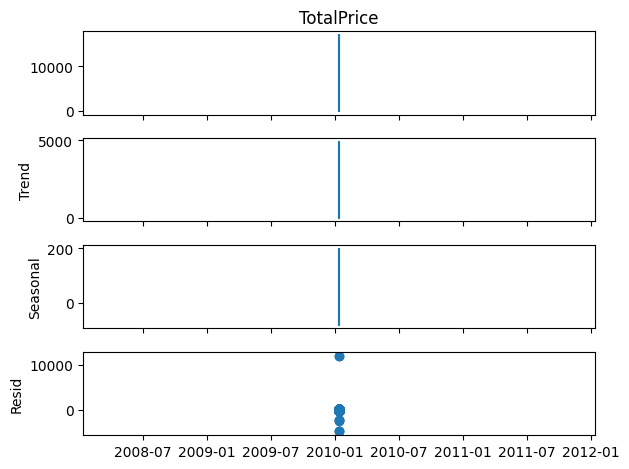

In [189]:
# Asegurarse de que la columna 'InvoiceDate' esté correctamente definida
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.set_index('InvoiceDate', inplace=True)

# Descomponer la serie temporal
result = seasonal_decompose(retail_df['TotalPrice'], model='additive', period=7)

# Graficar los componentes
result.plot()
plt.show()

## Pregunta 38
**Interpolación de datos faltantes:**
- Interpole los valores faltantes en la columna `TotalPrice` utilizando la interpolación lineal.

In [271]:

# Asegurarse de que la columna 'InvoiceDate' esté correctamente definida
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.set_index('InvoiceDate', inplace=True)

# Interpolar los valores faltantes en 'TotalPrice' utilizando interpolación lineal
retail_df['TotalPrice'] = retail_df['TotalPrice'].interpolate(method='linear')

# Mostrar solo las columnas 'TotalPrice' y 'TotalPrice' interpolada
print(retail_df[['TotalPrice']])

             TotalPrice
InvoiceDate            
2010-01-12        11.10
2010-01-12        41.70
2010-01-12        25.50
2010-01-12        29.70
2010-01-12        25.50
...                 ...
2010-01-12        25.50
2010-01-12        33.90
2010-01-12        17.85
2010-01-12        29.70
2010-01-12        12.60

[440 rows x 1 columns]


## Pregunta 39
**Análisis de autocorrelación:**
- Realice un análisis de autocorrelación en la columna `TotalPrice` del dataset `retail`.

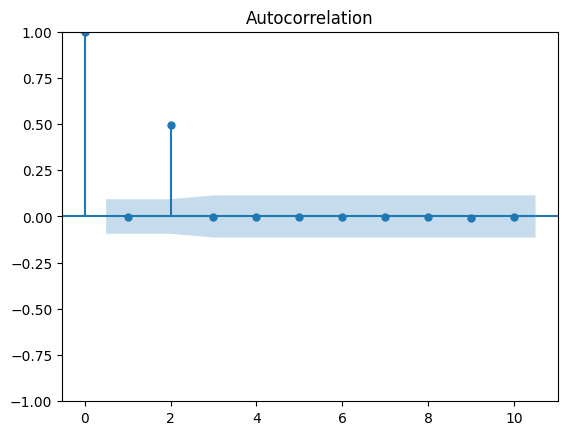

In [312]:
# Convertir la columna 'InvoiceDate' a datetime y establecerla como índice
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.set_index('InvoiceDate', inplace=True)

# Graficar la autocorrelación
plot_acf(retail_df['TotalPrice'], lags=10)
plt.show()

## Pregunta 40
**Conversión de zona horaria:**
- Convierta las fechas en la columna `InvoiceDate` a una zona horaria específica (por ejemplo, UTC) en el dataset `retail`.


In [352]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], errors='coerce')

# Verificar si la conversión a datetime fue exitosa
print(retail_df['InvoiceDate'].head())

# Establecer la zona horaria original (si no está definida)
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].dt.tz_localize('Europe/Madrid', ambiguous='NaT', nonexistent='shift_forward')

# Convertir a la zona horaria UTC
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].dt.tz_convert('UTC')

# Verificar el resultado
print(retail_df['InvoiceDate'].head())

0   2010-01-12
1   2010-01-12
2   2010-01-12
3   2010-01-12
4   2010-01-12
Name: InvoiceDate, dtype: datetime64[ns]
0   2010-01-11 23:00:00+00:00
1   2010-01-11 23:00:00+00:00
2   2010-01-11 23:00:00+00:00
3   2010-01-11 23:00:00+00:00
4   2010-01-11 23:00:00+00:00
Name: InvoiceDate, dtype: datetime64[ns, UTC]


# Parte 5 Preguntas de Negocio

## Pregunta 1
**Análisis de Retorno de Productos:**
- ¿Cuál es el porcentaje de productos devueltos por país (United Kingdom, Germany, Denmark)? ¿Hay alguna diferencia notable entre los países?

In [277]:
# Convertir la columna 'ReturnStatus' a booleano
retail_df['ReturnStatus'] = retail_df['ReturnStatus'] == 'Returned'

# Verificar la conversión
print(retail_df['ReturnStatus'].value_counts())

# Calcular el número total de productos por país
total_products = retail_df.groupby('Country').size()

# Calcular el número de productos devueltos por país
returned_products = retail_df[retail_df['ReturnStatus']].groupby('Country').size()

# Asegurarse de que todos los países estén representados en returned_products
returned_products = returned_products.reindex(total_products.index, fill_value=0)

# Calcular el porcentaje de productos devueltos por país
percentage_returned = (returned_products / total_products) * 100

# Redondear los resultados a dos decimales
percentage_returned = percentage_returned.round(2)

# Mostrar los resultados
print(percentage_returned)

ReturnStatus
False    226
True     214
Name: count, dtype: int64
Country
Denmark           44.62
Germany           46.31
United Kingdom    59.05
dtype: float64


## Pregunta 2
**Impacto de Promociones:**
- ¿Qué porcentaje de las ventas totales se realizaron utilizando códigos de promoción en cada uno de los tres países? ¿Cuál es el código de promoción más efectivo?

In [365]:
# Filtrar las ventas que utilizaron códigos de promoción
ventas_con_promocion = retail_df[retail_df['PromotionCode'].notna()]

# Calcular el porcentaje de ventas con promoción por país
ventas_por_pais = retail_df.groupby('Country')['InvoiceNo'].count()
ventas_con_promocion_por_pais = ventas_con_promocion.groupby('Country')['InvoiceNo'].count()
porcentaje_promocion_por_pais = (ventas_con_promocion_por_pais / ventas_por_pais) * 100

# Encontrar el código de promoción más efectivo
codigo_promocion_efectivo = ventas_con_promocion['PromotionCode'].value_counts().idxmax()

print("Porcentaje de ventas con promoción por país:")
print(porcentaje_promocion_por_pais)
print("\nCódigo de promoción más efectivo:")
print(codigo_promocion_efectivo)

Porcentaje de ventas con promoción por país:
Country
Denmark           100.0
Germany           100.0
United Kingdom    100.0
Name: InvoiceNo, dtype: float64

Código de promoción más efectivo:
PROMO10


## Pregunta 3
**Canales de Venta:**
- ¿Cuál es la distribución de ventas entre los diferentes canales de venta (`SaleChannel`) en cada país? ¿Hay un canal que sea predominantemente más utilizado en alguno de los países?

In [367]:
# Calcular la distribución de ventas por canal de venta y país
distribucion_ventas = retail_df.groupby(['Country', 'SaleChannel'])['InvoiceNo'].count().unstack().fillna(0)

# Calcular el porcentaje de ventas por canal de venta en cada país
porcentaje_ventas = distribucion_ventas.div(distribucion_ventas.sum(axis=1), axis=0) * 100

# Redondear los resultados a dos decimales
porcentaje_ventas = porcentaje_ventas.round(2)

print("Distribución de ventas por canal de venta y país:")
print(distribucion_ventas)
print("\nPorcentaje de ventas por canal de venta en cada país:")
print(porcentaje_ventas)

# Identificar el canal de venta más utilizado en cada país
canal_mas_utilizado = distribucion_ventas.idxmax(axis=1)

print("\nCanal de venta más utilizado en cada país:")
print(canal_mas_utilizado)

Distribución de ventas por canal de venta y país:
SaleChannel     In-Store  Online
Country                         
Denmark               95      91
Germany               78      71
United Kingdom        58      47

Porcentaje de ventas por canal de venta en cada país:
SaleChannel     In-Store  Online
Country                         
Denmark            51.08   48.92
Germany            52.35   47.65
United Kingdom     55.24   44.76

Canal de venta más utilizado en cada país:
Country
Denmark           In-Store
Germany           In-Store
United Kingdom    In-Store
dtype: object


## Pregunta 4
**Costos de Envío:**
- ¿Cuál es el costo promedio de envío por país? ¿Existen diferencias significativas en los costos de envío entre los tres países?

In [372]:
# Calcular el costo promedio de envío por país
costo_envio_promedio = retail_df.groupby('SalesRegion')['ShippingCost'].mean().round(2)

print("Costo promedio de envío por país:")
print(costo_envio_promedio)

# Calcular las diferencias significativas en los costos de envío entre los países
diferencias_significativas = costo_envio_promedio.max() - costo_envio_promedio.min()
diferencias_significativas=diferencias_significativas.round(2)


print("\nDiferencias significativas en los costos de envío entre los países:")
print(diferencias_significativas)

Costo promedio de envío por país:
SalesRegion
Asia             6.93
Australia        6.46
Europe           6.68
North America    6.43
South America    6.64
Name: ShippingCost, dtype: float64

Diferencias significativas en los costos de envío entre los países:
0.5


## Pregunta 5
**Peso del Producto y Costos de Envío:**
- ¿Existe una correlación entre el peso del producto (`ProductWeight`) y el costo de envío (`ShippingCost`)? ¿Cómo varía esta relación entre los diferentes países?

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlación general entre el peso del producto y el costo de envío: -0.34

Correlación entre el peso del producto y el costo de envío por país:
          Country  Correlacion
0         Denmark    -0.281593
1         Germany    -0.384927
2  United Kingdom    -0.383586


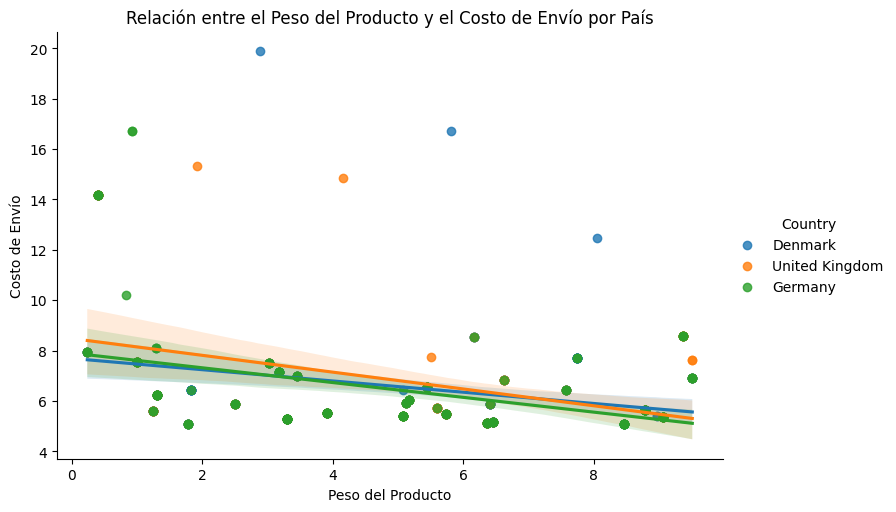

In [379]:
# Calcular la correlación entre ProductWeight y ShippingCost
correlacion_general = retail_df[['ProductWeight', 'ShippingCost']].corr().iloc[0, 1]

print(f"Correlación general entre el peso del producto y el costo de envío: {correlacion_general:.2f}")

# Calcular la correlación por país
correlacion_por_pais = retail_df.groupby('Country')[['ProductWeight', 'ShippingCost']].corr().iloc[0::2, -1].reset_index()
correlacion_por_pais.columns = ['Country', 'level_1', 'Correlacion']
correlacion_por_pais = correlacion_por_pais.drop(columns='level_1')

print("\nCorrelación entre el peso del producto y el costo de envío por país:")
print(correlacion_por_pais)

# Visualizar la relación entre ProductWeight y ShippingCost por país
sns.lmplot(x='ProductWeight', y='ShippingCost', hue='Country', data=retail_df, aspect=1.5)
plt.title('Relación entre el Peso del Producto y el Costo de Envío por País')
plt.xlabel('Peso del Producto')
plt.ylabel('Costo de Envío')
plt.show()

## Pregunta 6
**Descuentos y Comportamiento de Compra:**
- ¿Qué porcentaje de las compras en cada país se realizaron con algún tipo de descuento (`Discount`)? ¿Los clientes en algún país en particular son más propensos a utilizar descuentos?

In [381]:
# Calcular el porcentaje de compras con descuento por país
descuentos_por_pais = retail_df.groupby('Country')['Discount'].apply(lambda x: (x > 0).mean() * 100).reset_index()
descuentos_por_pais.columns = ['Country', 'Porcentaje_Descuento']

print("Porcentaje de compras con descuento por país:")
print(descuentos_por_pais)

Porcentaje de compras con descuento por país:
          Country  Porcentaje_Descuento
0         Denmark                 100.0
1         Germany                 100.0
2  United Kingdom                 100.0


## Pregunta 7
**Análisis de Categorías de Productos:**
- ¿Cuáles son las categorías de productos (`Category`) más vendidas en cada país? ¿Existen diferencias en las preferencias de categorías de productos entre los países?

In [382]:
# Calcular las categorías de productos más vendidas por país
categorias_mas_vendidas = retail_df.groupby(['Country', 'Category']).size().reset_index(name='Count')
categorias_mas_vendidas = categorias_mas_vendidas.sort_values(['Country', 'Count'], ascending=[True, False])

# Obtener la categoría más vendida por país
categorias_top = categorias_mas_vendidas.groupby('Country').first().reset_index()

print("Categorías de productos más vendidas por país:")
print(categorias_top)

Categorías de productos más vendidas por país:
          Country       Category  Count
0         Denmark  Home & Garden    106
1         Germany  Home & Garden     84
2  United Kingdom  Home & Garden     55


## Pregunta 8
**Rendimiento de Proveedores:**
- ¿Cuál es el proveedor (`Supplier`) con el mayor volumen de ventas en cada país? ¿Cómo se distribuyen las ventas entre los diferentes proveedores en cada uno de los países?

In [383]:
# Calcular el proveedor con el mayor volumen de ventas en cada país
mayor_volumen_ventas = retail_df.groupby(['Country', 'Supplier'])['Sales'].sum().reset_index()
mayor_volumen_ventas = mayor_volumen_ventas.sort_values(['Country', 'Sales'], ascending=[True, False])

# Obtener el proveedor con el mayor volumen de ventas por país
proveedor_top = mayor_volumen_ventas.groupby('Country').first().reset_index()

print("Proveedor con el mayor volumen de ventas por país:")
print(proveedor_top)

# Calcular la distribución de ventas entre los diferentes proveedores en cada país
distribucion_ventas = retail_df.groupby(['Country', 'Supplier'])['Sales'].sum().reset_index()

print("\nDistribución de ventas entre los diferentes proveedores en cada país:")
print(distribucion_ventas)

Proveedor con el mayor volumen de ventas por país:
          Country    Supplier     Sales
0         Denmark  Supplier A  36743.91
1         Germany  Supplier A   2032.97
2  United Kingdom  Supplier A   1236.03

Distribución de ventas entre los diferentes proveedores en cada país:
           Country    Supplier     Sales
0          Denmark  Supplier A  36743.91
1          Denmark  Supplier B    556.70
2          Denmark  Supplier C    703.20
3          Denmark  Supplier D    440.70
4          Germany  Supplier A   2032.97
5          Germany  Supplier B    588.10
6          Germany  Supplier C    655.30
7          Germany  Supplier D    210.18
8   United Kingdom  Supplier A   1236.03
9   United Kingdom  Supplier B    418.60
10  United Kingdom  Supplier C    265.80
11  United Kingdom  Supplier D    339.00


## Pregunta 9
**Promedio de Precios de Venta:**
- ¿Cuál es el precio promedio de venta (`UnitPrice`) de los productos en cada país? ¿Existen diferencias significativas en los precios de venta entre los tres países?

In [384]:
# Calcular el precio promedio de venta por país
precio_promedio_por_pais = retail_df.groupby('Country')['UnitPrice'].mean().reset_index()
precio_promedio_por_pais.columns = ['Country', 'PrecioPromedio']

print("Precio promedio de venta por país:")
print(precio_promedio_por_pais)

Precio promedio de venta por país:
          Country  PrecioPromedio
0         Denmark        4.681882
1         Germany        3.590336
2  United Kingdom        3.603714


## Pregunta 10
**Tendencias de Venta por Región:**
- ¿Cómo se distribuyen las ventas (`TotalPrice`) por región de ventas (`SalesRegion`) dentro de cada país? ¿Hay alguna región que destaque en términos de volumen de ventas en alguno de los países?

In [385]:
# Calcular el volumen total de ventas por región de ventas dentro de cada país
ventas_por_region = retail_df.groupby(['Country', 'SalesRegion'])['TotalPrice'].sum().reset_index()
ventas_por_region.columns = ['Country', 'SalesRegion', 'TotalSales']

print("Distribución de ventas por región de ventas dentro de cada país:")
print(ventas_por_region)

# Identificar la región con el mayor volumen de ventas en cada país
region_top = ventas_por_region.loc[ventas_por_region.groupby('Country')['TotalSales'].idxmax()].reset_index(drop=True)

print("\nRegión con el mayor volumen de ventas por país:")
print(region_top)

Distribución de ventas por región de ventas dentro de cada país:
           Country    SalesRegion  TotalSales
0          Denmark           Asia      751.35
1          Denmark      Australia    35143.35
2          Denmark         Europe      648.99
3          Denmark  North America      774.23
4          Denmark  South America     1041.64
5          Germany           Asia      460.89
6          Germany      Australia      925.15
7          Germany         Europe      770.89
8          Germany  North America      679.79
9          Germany  South America      608.13
10  United Kingdom           Asia      292.79
11  United Kingdom      Australia      378.74
12  United Kingdom         Europe      564.85
13  United Kingdom  North America      434.73
14  United Kingdom  South America      373.62

Región con el mayor volumen de ventas por país:
          Country SalesRegion  TotalSales
0         Denmark   Australia    35143.35
1         Germany   Australia      925.15
2  United Kingdom      E

## Pregunta 11
**Análisis de Frecuencia de Compras:**
- ¿Cuál es la frecuencia promedio de compras por cliente (`CustomerID`) en cada país? ¿Los clientes en algún país compran con mayor frecuencia?


In [386]:
# Calcular la frecuencia de compras por cliente
frecuencia_compras = retail_df.groupby(['Country', 'CustomerID']).size().reset_index(name='Frecuencia')

# Calcular la frecuencia promedio de compras por país
frecuencia_promedio_por_pais = frecuencia_compras.groupby('Country')['Frecuencia'].mean().reset_index()
frecuencia_promedio_por_pais.columns = ['Country', 'FrecuenciaPromedio']

print("Frecuencia promedio de compras por cliente en cada país:")
print(frecuencia_promedio_por_pais)

Frecuencia promedio de compras por cliente en cada país:
          Country  FrecuenciaPromedio
0         Denmark            4.894737
1         Germany            4.806452
2  United Kingdom            3.500000


## Pregunta 12
**Valor de Vida del Cliente:**
- ¿Cuál es el valor promedio de vida del cliente (suma de `TotalPrice`) en cada país? ¿Existe una diferencia significativa en el valor de vida del cliente entre los tres países?

In [389]:
# Calcular el valor de vida del cliente (CLV) por cliente
clv_por_cliente = retail_df.groupby(['Country', 'CustomerID'])['TotalPrice'].sum().reset_index()
clv_por_cliente =clv_por_cliente.round(2) 

# Calcular el valor promedio de vida del cliente por país
clv_promedio_por_pais = clv_por_cliente.groupby('Country')['TotalPrice'].mean().reset_index()
clv_promedio_por_pais.columns = ['Country', 'CLVPromedio']

print("Valor promedio de vida del cliente por país:")
print(clv_promedio_por_pais)

Valor promedio de vida del cliente por país:
          Country  CLVPromedio
0         Denmark  1009.462105
1         Germany   111.124194
2  United Kingdom    68.157667


## Pregunta 13
**Métodos de Pago:**
- ¿Cuál es el método de pago (`PaymentMethod`) más utilizado en cada país? ¿Hay una preferencia notable por ciertos métodos de pago en algún país específico?

In [390]:
# Calcular el método de pago más utilizado por país
metodo_pago_mas_utilizado = retail_df.groupby(['Country', 'PaymentMethod']).size().reset_index(name='Count')
metodo_pago_mas_utilizado = metodo_pago_mas_utilizado.sort_values(['Country', 'Count'], ascending=[True, False])

# Obtener el método de pago más utilizado por país
metodo_pago_top = metodo_pago_mas_utilizado.groupby('Country').first().reset_index()

print("Método de pago más utilizado por país:")
print(metodo_pago_top)

Método de pago más utilizado por país:
          Country  PaymentMethod  Count
0         Denmark    Credit Card     42
1         Germany      Gift Card     36
2  United Kingdom  Bank Transfer     34


## Pregunta 14
**Evaluación de la Eficiencia de Descuentos:**
- ¿Qué impacto tienen los descuentos (`Discount`) en el valor total de las ventas en cada país? ¿Los descuentos resultan en un aumento significativo en el volumen de ventas?

In [391]:
# Calcular el valor total de las ventas con y sin descuento por país
ventas_con_descuento = retail_df[retail_df['Discount'] > 0].groupby('Country')['TotalPrice'].sum().reset_index()
ventas_con_descuento.columns = ['Country', 'VentasConDescuento']

ventas_sin_descuento = retail_df[retail_df['Discount'] == 0].groupby('Country')['TotalPrice'].sum().reset_index()
ventas_sin_descuento.columns = ['Country', 'VentasSinDescuento']

# Unir los datos en un solo DataFrame
ventas_totales = pd.merge(ventas_con_descuento, ventas_sin_descuento, on='Country', how='outer').fillna(0)

# Calcular el impacto de los descuentos en el valor total de las ventas
ventas_totales['ImpactoDescuento'] = (ventas_totales['VentasConDescuento'] - ventas_totales['VentasSinDescuento']) / ventas_totales['VentasSinDescuento'] * 100

print("Impacto de los descuentos en el valor total de las ventas por país:")
print(ventas_totales)

Impacto de los descuentos en el valor total de las ventas por país:
          Country  VentasConDescuento  VentasSinDescuento  ImpactoDescuento
0         Denmark            38359.56                 0.0               inf
1         Germany             3444.85                 0.0               inf
2  United Kingdom             2044.73                 0.0               inf


## Pregunta 15
**Análisis de Clientes por Región:**
- ¿Cuál es la distribución de clientes (`CustomerID`) por región de ventas (`SalesRegion`) en cada país? ¿Hay regiones con una concentración notablemente mayor de clientes?

In [392]:
# Calcular la cantidad de clientes únicos por región de ventas dentro de cada país
clientes_por_region = retail_df.groupby(['Country', 'SalesRegion'])['CustomerID'].nunique().reset_index()
clientes_por_region.columns = ['Country', 'SalesRegion', 'NumeroClientes']

print("Distribución de clientes por región de ventas dentro de cada país:")
print(clientes_por_region)

# Identificar la región con la mayor cantidad de clientes en cada país
region_top_clientes = clientes_por_region.loc[clientes_por_region.groupby('Country')['NumeroClientes'].idxmax()].reset_index(drop=True)

print("\nRegión con la mayor cantidad de clientes por país:")
print(region_top_clientes)

Distribución de clientes por región de ventas dentro de cada país:
           Country    SalesRegion  NumeroClientes
0          Denmark           Asia              21
1          Denmark      Australia              23
2          Denmark         Europe              16
3          Denmark  North America              22
4          Denmark  South America              22
5          Germany           Asia              11
6          Germany      Australia              20
7          Germany         Europe              21
8          Germany  North America              16
9          Germany  South America              17
10  United Kingdom           Asia              12
11  United Kingdom      Australia              17
12  United Kingdom         Europe              15
13  United Kingdom  North America              14
14  United Kingdom  South America              12

Región con la mayor cantidad de clientes por país:
          Country SalesRegion  NumeroClientes
0         Denmark   Australia      

## Pregunta 16
**Promociones y Segmentos de Mercado:**
- ¿Cuál es el código de promoción (`PromotionCode`) más utilizado en cada segmento de mercado (`SalesRegion`) dentro de cada país?

In [398]:
# Convertir el código de promoción a booleano (True si hay un código de promoción, False si no)
retail_df['PromotionUsed'] = retail_df['PromotionCode'].notnull()

# Calcular el código de promoción más utilizado por región de ventas dentro de cada país
promocion_mas_utilizada = retail_df.groupby(['Country', 'SalesRegion', 'PromotionCode']).size().reset_index(name='Count')
promocion_mas_utilizada = promocion_mas_utilizada.sort_values(['Country', 'SalesRegion', 'Count'], ascending=[True, True, False])

# Obtener el código de promoción más utilizado por región de ventas dentro de cada país
promocion_top = promocion_mas_utilizada.groupby(['Country', 'SalesRegion']).first().reset_index()

print("Código de promoción más utilizado por región de ventas dentro de cada país:")
print(promocion_top)

Código de promoción más utilizado por región de ventas dentro de cada país:
           Country    SalesRegion PromotionCode  Count
0          Denmark           Asia       PROMO10     16
1          Denmark      Australia     DISCOUNT5     17
2          Denmark         Europe       PROMO10     12
3          Denmark  North America        SALE15     14
4          Denmark  South America       PROMO10     17
5          Germany           Asia     DISCOUNT5     10
6          Germany      Australia     DISCOUNT5     15
7          Germany         Europe       PROMO10     14
8          Germany  North America        SALE15     11
9          Germany  South America     DISCOUNT5     13
10  United Kingdom           Asia        SALE15     10
11  United Kingdom      Australia       PROMO10     13
12  United Kingdom         Europe     DISCOUNT5     11
13  United Kingdom  North America     DISCOUNT5      7
14  United Kingdom  South America       PROMO10     11


## Pregunta 17
**Análisis de Temporadas de Venta:**
- ¿Existen patrones estacionales en las ventas (`InvoiceDate`) en cada país? ¿Hay picos de ventas en ciertos meses o temporadas en alguno de los países?

In [400]:
# Convertir InvoiceDate a formato de fecha
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extraer el mes y el año de la fecha de la factura
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Year'] = retail_df['InvoiceDate'].dt.year

# Agrupar las ventas por país y mes
ventas_mensuales = retail_df.groupby(['Country', 'Year', 'Month']).size().reset_index(name='Sales')

## Pregunta 18
**Preferencias de Productos:**
- ¿Cuáles son los productos (`StockCode` y `Description`) más vendidos en cada país? ¿Hay diferencias notables en las preferencias de productos entre los países?

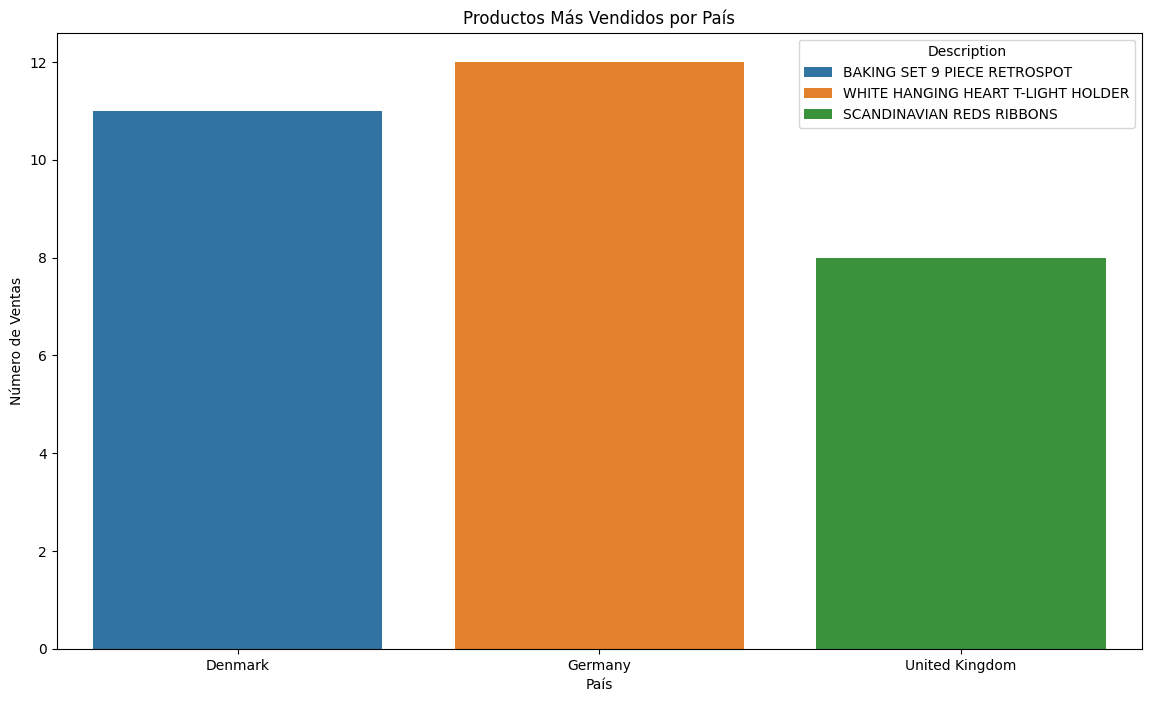

In [401]:
# Agrupar las ventas por país y producto
productos_mas_vendidos = retail_df.groupby(['Country', 'StockCode', 'Description']).size().reset_index(name='Sales')

# Ordenar los productos por ventas en cada país
productos_mas_vendidos = productos_mas_vendidos.sort_values(['Country', 'Sales'], ascending=[True, False])

# Obtener el producto más vendido por país
productos_top = productos_mas_vendidos.groupby('Country').first().reset_index()

# Visualizar los datos
plt.figure(figsize=(14, 8))
sns.barplot(data=productos_top, x='Country', y='Sales', hue='Description')
plt.title('Productos Más Vendidos por País')
plt.xlabel('País')
plt.ylabel('Número de Ventas')
plt.show()

## Pregunta 19
**Impacto de las Devoluciones en las Ventas:**
- ¿Qué porcentaje de las ventas totales son afectadas por devoluciones (`ReturnStatus`)? ¿Cómo varía este porcentaje entre los diferentes países?

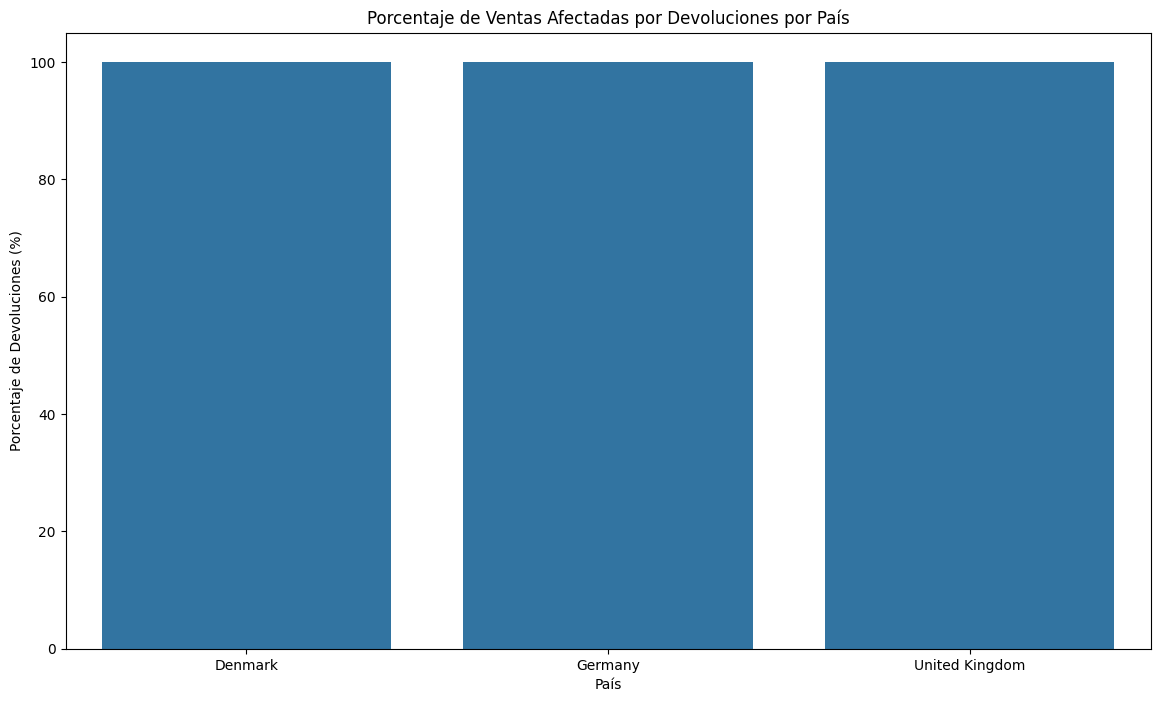

In [402]:
# Asegurarse de que ReturnStatus es booleano
retail_df['ReturnStatus'] = retail_df['ReturnStatus'].astype(bool)

# Calcular el total de ventas y el total de devoluciones por país
ventas_totales = retail_df.groupby('Country').size().reset_index(name='TotalSales')
devoluciones_totales = retail_df[retail_df['ReturnStatus']].groupby('Country').size().reset_index(name='TotalReturns')

# Unir los datos de ventas y devoluciones
ventas_devoluciones = pd.merge(ventas_totales, devoluciones_totales, on='Country', how='left')
ventas_devoluciones['TotalReturns'] = ventas_devoluciones['TotalReturns'].fillna(0)

# Calcular el porcentaje de devoluciones
ventas_devoluciones['ReturnPercentage'] = (ventas_devoluciones['TotalReturns'] / ventas_devoluciones['TotalSales']) * 100

# Visualizar los datos
plt.figure(figsize=(14, 8))
sns.barplot(data=ventas_devoluciones, x='Country', y='ReturnPercentage')
plt.title('Porcentaje de Ventas Afectadas por Devoluciones por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Devoluciones (%)')
plt.show()

## Pregunta 20
**Análisis de Margen de Ganancia:**
- ¿Cuál es el margen de ganancia promedio (`UnitPrice - Discount`) por producto en cada país? ¿Hay productos o categorías con márgenes significativamente mayores o menores en alguno de los países?

Margen de ganancia promedio por producto en cada país:
            Country StockCode                         Description  \
0           Denmark     21723  STRIPED CHARLIE+LOLA CHARLOTTE BAG   
1           Denmark     21724                RED HARMONICA IN BOX   
2           Denmark     21730    GLASS STAR FROSTED TLIGHT HOLDER   
3           Denmark     21731       RED TOADSTOOL LED NIGHT LIGHT   
4           Denmark     21754            HOME BUILDING BLOCK WORD   
..              ...       ...                                 ...   
98   United Kingdom    84406B      CREAM CUPID HEARTS COAT HANGER   
99   United Kingdom     84879       ASSORTED COLOUR BIRD ORNAMENT   
100  United Kingdom    84907C   PACK OF 12 BLUE RETROSPOT TISSUES   
101  United Kingdom     84988      SET 2 TEA TOWELS I LOVE LONDON   
102  United Kingdom    85123A  WHITE HANGING HEART T-LIGHT HOLDER   

     ProfitMargin  
0            2.85  
1            1.15  
2            4.10  
3            1.50  
4            5.8

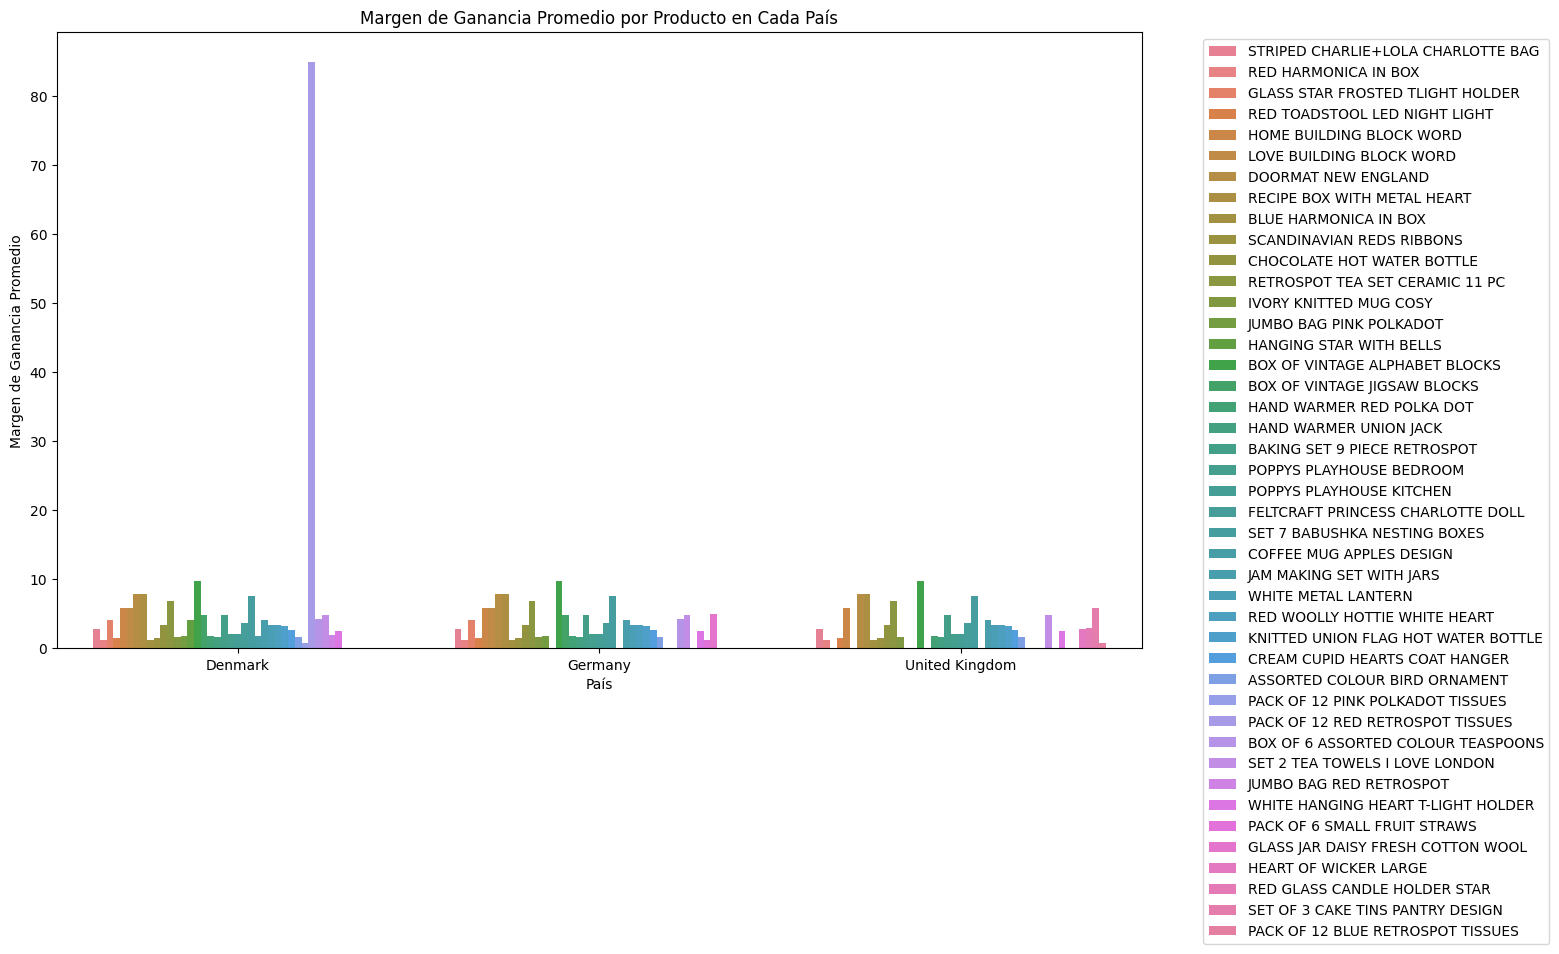

In [404]:
# Calcular el margen de ganancia
retail_df['ProfitMargin'] = retail_df['UnitPrice'] - retail_df['Discount']

# Agrupar los datos por país y producto para obtener el margen de ganancia promedio
margen_ganancia_promedio = retail_df.groupby(['Country', 'StockCode', 'Description'])['ProfitMargin'].mean().reset_index()

# Imprimir el margen de ganancia promedio por producto en cada país
print("Margen de ganancia promedio por producto en cada país:")
print(margen_ganancia_promedio)

# Visualizar los datos
plt.figure(figsize=(14, 8))
sns.barplot(data=margen_ganancia_promedio, x='Country', y='ProfitMargin', hue='Description')
plt.title('Margen de Ganancia Promedio por Producto en Cada País')
plt.xlabel('País')
plt.ylabel('Margen de Ganancia Promedio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()